### **Data cleaning and Reformatting data to make it suitable for Finetuning**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# creating a folder and changing path to point to it
%cd drive/MyDrive/courses/cse519/dsf-project

/content/drive/MyDrive/courses/cse519/dsf-project


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
ca_plates=pd.read_csv('ca_license_plates.csv')
ny_accepted = pd.read_csv('ny-accepted-plates.csv')
ny_rejected = pd.read_csv('ny-rejected-plates.csv')

In [5]:
ca_plates.head()

,plate,review_reason_code,customer_meaning,reviewer_comments,status
0,AZIZ714,2,LAST NAME,714 AREA CODE,N
1,BATBOX1,1,BATMOBILE (BATMAN) PLUS SHAPE OF VEHICLE (SCIO...,BOX,N
2,BBOMBS,2,NO MICRO AVAILABLE,BOMBS,N
3,BEACHY1,4,LOVE THE BEACH,BEACHY LOOKS LIKE BITCHY 1,N
4,BLK PWR5,2,STRENGTH OF FAMILY,BLACK POWER,N


In [6]:
ny_accepted.head()

,date,plate
0,2010-10-01,ANDARE
1,2010-10-01,1TWIN
2,2010-10-01,11VROD
3,2010-10-01,4SKNMC
4,2010-10-01,7IRON6


In [7]:
# setting the status as accepted for plates in ny_accepted dataset
ny_accepted['status']='Accepted'

In [8]:
ny_accepted.head()

,date,plate,status
0,2010-10-01,ANDARE,Accepted
1,2010-10-01,1TWIN,Accepted
2,2010-10-01,11VROD,Accepted
3,2010-10-01,4SKNMC,Accepted
4,2010-10-01,7IRON6,Accepted


In [9]:
# setting the status as rejected for plates in ny_rejected dataset
ny_rejected['status']='Rejected'

In [10]:
ny_rejected.head()

,date,plate,status
0,2010-10-02,00DADDY,Rejected
1,2010-10-02,3170F400,Rejected
2,2010-10-02,RUBMYDUB,Rejected
3,2010-10-02,FOX1NYP,Rejected
4,2010-10-05,88B8B8,Rejected


In [11]:
# combining the accepted and rejected plates in NY datasets into a single dataframe
ny_combined=pd.concat([ny_accepted,ny_rejected], ignore_index=True)

In [12]:
ny_combined.head()

,date,plate,status
0,2010-10-01,ANDARE,Accepted
1,2010-10-01,1TWIN,Accepted
2,2010-10-01,11VROD,Accepted
3,2010-10-01,4SKNMC,Accepted
4,2010-10-01,7IRON6,Accepted


In [13]:
# the extent of the ny dataset in total
ny_combined.shape

(133636, 3)

In [14]:
# Plot to show No of vanity plates issued in NY over the past four years (according to the dataset)
years = ['2016','2017','2018','2019']

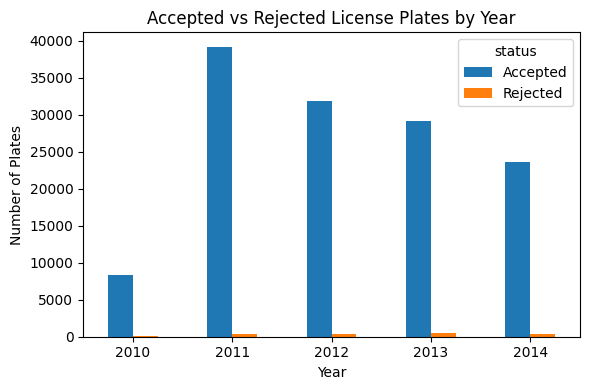

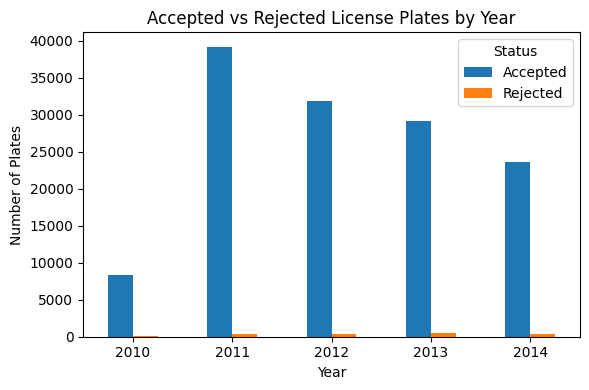

In [15]:
ny_combined['date'] = pd.to_datetime(ny_combined['date'])

# Extract the year from the 'date' column
ny_combined['year'] = ny_combined['date'].dt.year

# Group by 'year' and 'Status', then count occurrences
status_counts = ny_combined.groupby(['year', 'status']).size().unstack(fill_value=0)

# Plotting the data
status_counts.plot(kind='bar', stacked=False, figsize=(6, 4))

# Add titles and labels
plt.title('Accepted vs Rejected License Plates by Year')
plt.xlabel('Year')
plt.ylabel('Number of Plates')
plt.xticks(rotation=0)
plt.legend(title='status', loc='upper right')

# Show the plot
plt.tight_layout()
plt.show()
ny_combined['year'] = ny_combined['date'].dt.year

# Group by 'year' and 'Status', then count occurrences
status_counts = ny_combined.groupby(['year', 'status']).size().unstack(fill_value=0)

# Plotting the data
status_counts.plot(kind='bar', stacked=False, figsize=(6, 4))

# Add titles and labels
plt.title('Accepted vs Rejected License Plates by Year')
plt.xlabel('Year')
plt.ylabel('Number of Plates')
plt.xticks(rotation=0)
plt.legend(title='Status', loc='upper right')

# Show the plot
plt.tight_layout()
plt.show()

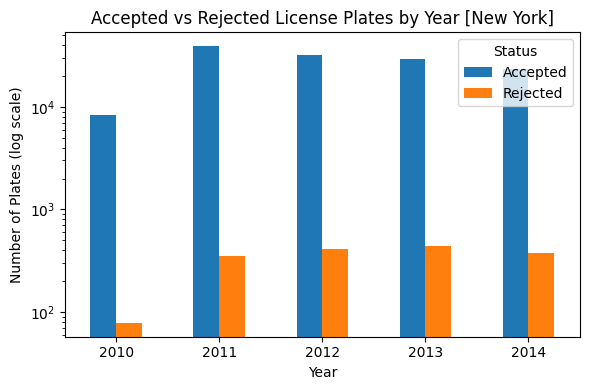

In [16]:
# Plot with log scale on the y-axis
status_counts.plot(kind='bar', stacked=False, figsize=(6, 4))

# Set y-axis to logarithmic scale
plt.yscale('log')

# Add titles and labels
plt.title('Accepted vs Rejected License Plates by Year [New York]')
plt.xlabel('Year')
plt.ylabel('Number of Plates (log scale)')
plt.xticks(rotation=0)
plt.legend(title='Status', loc='upper right')

# Show the plot
plt.tight_layout()
plt.show()

In [17]:
ca_plates.head()

,plate,review_reason_code,customer_meaning,reviewer_comments,status
0,AZIZ714,2,LAST NAME,714 AREA CODE,N
1,BATBOX1,1,BATMOBILE (BATMAN) PLUS SHAPE OF VEHICLE (SCIO...,BOX,N
2,BBOMBS,2,NO MICRO AVAILABLE,BOMBS,N
3,BEACHY1,4,LOVE THE BEACH,BEACHY LOOKS LIKE BITCHY 1,N
4,BLK PWR5,2,STRENGTH OF FAMILY,BLACK POWER,N


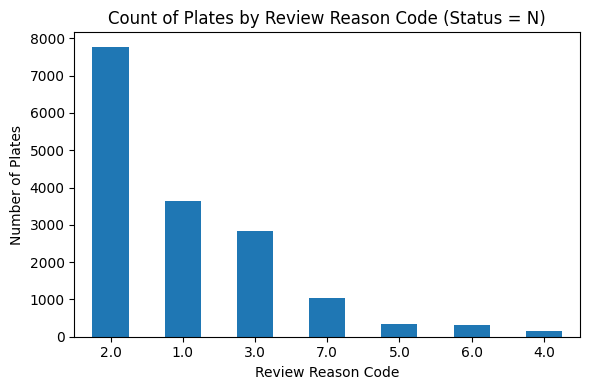

In [18]:
# Convert 'review_reason_code' to numeric, handling errors by coercing non-numeric values to NaN
ca_plates['review_reason_code'] = pd.to_numeric(ca_plates['review_reason_code'], errors='coerce')

# Filter the dataset, but now with the numeric 'review_reason_code' column
filtered_data = ca_plates[(ca_plates['status'] == 'N') & (ca_plates['review_reason_code'].between(1, 7))]

# Group by 'review_reason_code' and count the occurrences
review_counts = filtered_data['review_reason_code'].value_counts()

# Plot the data
plt.figure(figsize=(6, 4))
review_counts.plot(kind='bar', color='#1f77b4')

# Add titles and labels
plt.title('Count of Plates by Review Reason Code (Status = N)')
plt.xlabel('Review Reason Code')
plt.ylabel('Number of Plates')
plt.xticks(rotation=0)

# Show the plot
plt.tight_layout()
plt.show()

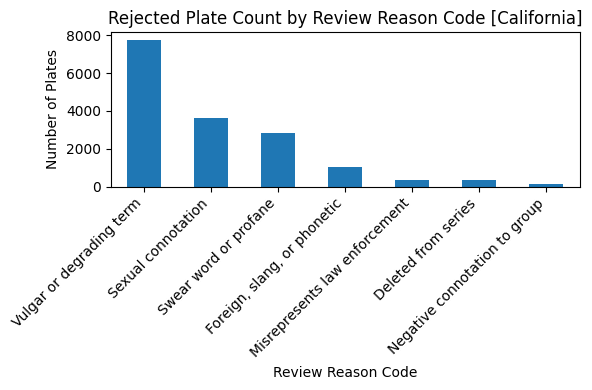

In [19]:
ca_plates = pd.DataFrame(ca_plates)

# Create a dictionary for shortened labels
review_reason_labels = {
    1: 'Sexual connotation',
    2: 'Vulgar or degrading term',
    3: 'Swear word or profane',
    4: 'Negative connotation to group',
    5: 'Misrepresents law enforcement',
    6: 'Deleted from series',
    7: 'Foreign, slang, or phonetic',
    8: 'Not Applicable'
}

# Convert 'review_reason_code' to numeric, handling errors by coercing non-numeric values to NaN
ca_plates['review_reason_code'] = pd.to_numeric(ca_plates['review_reason_code'], errors='coerce')

# Filter the dataset, but now with the numeric 'review_reason_code' column
filtered_data = ca_plates[(ca_plates['status'] == 'N') & (ca_plates['review_reason_code'].between(1, 7))]

# Group by 'review_reason_code' and count the occurrences
review_counts = filtered_data['review_reason_code'].value_counts()

# Plot the data
plt.figure(figsize=(6, 4))
ax = review_counts.plot(kind='bar', color='#1f77b4')

# Relabel x-axis ticks with the corresponding shortened labels
ax.set_xticklabels([review_reason_labels.get(code, str(code)) for code in review_counts.index])

# Add titles and labels
plt.title('Rejected Plate Count by Review Reason Code [California]')
plt.xlabel('Review Reason Code')
plt.ylabel('Number of Plates')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Show the plot
plt.tight_layout()
plt.show()

In [20]:
ca_plates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23463 entries, 0 to 23462
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   plate               23463 non-null  object 
 1   review_reason_code  20062 non-null  float64
 2   customer_meaning    21187 non-null  object 
 3   reviewer_comments   23443 non-null  object 
 4   status              23441 non-null  object 
dtypes: float64(1), object(4)
memory usage: 916.6+ KB


In [21]:
# Get unique values in the 'status' column
unique_status_values = ca_plates["status"].unique()

unique_status_values

#print(unique_status_values)

array(['N', 'Y', 'REMOVE', nan, '1', '?', 'H', 'R', 'M', 'T'],
      dtype=object)

In [22]:
# Count rows where 'status' is not 'Y' or 'N'
count_not_YN = ca_plates[~ca_plates["status"].isin(["Y", "N"])].shape[0]

print("Count of rows with status not 'Y' or 'N':", count_not_YN)


Count of rows with status not 'Y' or 'N': 33


In [23]:
filtered_ca_plates = ca_plates[ca_plates["status"].isin(["Y", "N"])].reset_index(drop=True)

print(filtered_ca_plates)

          plate  review_reason_code  \
0       AZIZ714                 2.0   
1       BATBOX1                 1.0   
2        BBOMBS                 2.0   
3       BEACHY1                 4.0   
4      BLK PWR5                 2.0   
...         ...                 ...   
23425   4KTMGAL                 1.0   
23426    88 CAP                 2.0   
23427   BLNT 4C                 2.0   
23428   VIBRATR                 1.0   
23429   666KIDD                 2.0   

                                        customer_meaning  \
0                                              LAST NAME   
1      BATMOBILE (BATMAN) PLUS SHAPE OF VEHICLE (SCIO...   
2                                     NO MICRO AVAILABLE   
3                                         LOVE THE BEACH   
4                                     STRENGTH OF FAMILY   
...                                                  ...   
23425                             TO TRAILER MY KTM BIKE   
23426                                         88 CA

In [24]:
ca_plates["status"] = ca_plates["status"].replace({"N": "Rejected", "Y": "Accepted"})
filtered_ca_plates["status"] = filtered_ca_plates["status"].replace({"N": "Rejected", "Y": "Accepted"})

print(ca_plates)

          plate  review_reason_code  \
0       AZIZ714                 2.0   
1       BATBOX1                 1.0   
2        BBOMBS                 2.0   
3       BEACHY1                 4.0   
4      BLK PWR5                 2.0   
...         ...                 ...   
23458   4KTMGAL                 1.0   
23459    88 CAP                 2.0   
23460   BLNT 4C                 2.0   
23461   VIBRATR                 1.0   
23462   666KIDD                 2.0   

                                        customer_meaning  \
0                                              LAST NAME   
1      BATMOBILE (BATMAN) PLUS SHAPE OF VEHICLE (SCIO...   
2                                     NO MICRO AVAILABLE   
3                                         LOVE THE BEACH   
4                                     STRENGTH OF FAMILY   
...                                                  ...   
23458                             TO TRAILER MY KTM BIKE   
23459                                         88 CA

In [25]:
ca_plates.shape

(23463, 5)

In [26]:
filtered_ca_plates.shape

(23430, 5)

In [27]:
# Counting the occurrences of each status in CA dataset
status_counts = ca_plates["status"].value_counts()

# Get the count of 'Accepted' and 'Rejected'
accepted_count = status_counts.get("Accepted", 0)
rejected_count = status_counts.get("Rejected", 0)

print(f"Accepted plates count: {accepted_count}")
print(f"Rejected plates count: {rejected_count}")

Accepted plates count: 4673
Rejected plates count: 18757


In [28]:
# Counting the occurrences of each status in NY dataset
status_counts = ny_combined["status"].value_counts()

# Get the count of 'Accepted' and 'Rejected'
accepted_count = status_counts.get("Accepted", 0)
rejected_count = status_counts.get("Rejected", 0)

print(f"Accepted plates count: {accepted_count}")
print(f"Rejected plates count: {rejected_count}")

Accepted plates count: 131990
Rejected plates count: 1646


In [29]:
# checking the dataset for categories which do not fall under the 7 we are interested in exploring
categories = filtered_ca_plates['review_reason_code'].unique()
print(categories)

[ 2.  1.  4. nan  5.  3.  7.  8.  6.  9. 11. 10.]


In [30]:
nan_count = filtered_ca_plates['review_reason_code'].isna().sum()
print(nan_count)

3395


In [31]:
# Dropping rows with NaN in 'review_reason_code'
filtered_ca_plates.dropna(subset=['review_reason_code'], inplace=True)

print("Filtered CA plates DataFrame after dropping NaN values in 'review_reason_code':")
print(filtered_ca_plates.shape)

Filtered CA plates DataFrame after dropping NaN values in 'review_reason_code':
(20035, 5)


In [32]:
categories = filtered_ca_plates['review_reason_code'].unique()
print(categories)

[ 2.  1.  4.  5.  3.  7.  8.  6.  9. 11. 10.]


In [33]:
# removing the category codes where it is not between 1 and 7
filtered_ca_plates = filtered_ca_plates[filtered_ca_plates['review_reason_code'].between(1, 7)]

print(filtered_ca_plates['review_reason_code'].unique())

[2. 1. 4. 5. 3. 7. 6.]


In [34]:
filtered_ca_plates.shape

(20006, 5)

In [35]:
# Counting the occurrences of each status in CA dataset
status_counts = filtered_ca_plates["status"].value_counts()

# Get the count of 'Accepted' and 'Rejected'
accepted_count = status_counts.get("Accepted", 0)
rejected_count = status_counts.get("Rejected", 0)

print(f"Accepted plates count: {accepted_count}")
print(f"Rejected plates count: {rejected_count}")

Accepted plates count: 3900
Rejected plates count: 16106


In [36]:
#can be moved
# append Ny_plates here
ny_updated = pd.read_csv("ny_plates_updated.csv")

In [37]:
ny_updated.head()

,plate,status,category
0,ANDARE,Accepted,Not Applicable
1,1TWIN,Accepted,Not Applicable
2,11VROD,Accepted,Not Applicable
3,4SKNMC,Accepted,Not Applicable
4,7IRON6,Accepted,Not Applicable


In [38]:
ny_updated['reviewer_comments'] = ny_updated.apply(lambda row: 'No offensive content' if row['status'] == 'Accepted' else '', axis=1)

In [39]:
ny_updated.head()

,plate,status,category,reviewer_comments
0,ANDARE,Accepted,Not Applicable,No offensive content
1,1TWIN,Accepted,Not Applicable,No offensive content
2,11VROD,Accepted,Not Applicable,No offensive content
3,4SKNMC,Accepted,Not Applicable,No offensive content
4,7IRON6,Accepted,Not Applicable,No offensive content


In [40]:
filtered_ca_plates.head()

,plate,review_reason_code,customer_meaning,reviewer_comments,status
0,AZIZ714,2.0,LAST NAME,714 AREA CODE,Rejected
1,BATBOX1,1.0,BATMOBILE (BATMAN) PLUS SHAPE OF VEHICLE (SCIO...,BOX,Rejected
2,BBOMBS,2.0,NO MICRO AVAILABLE,BOMBS,Rejected
3,BEACHY1,4.0,LOVE THE BEACH,BEACHY LOOKS LIKE BITCHY 1,Rejected
4,BLK PWR5,2.0,STRENGTH OF FAMILY,BLACK POWER,Rejected


In [41]:
ny_updated['review_reason_code'] = ny_updated.apply(lambda row: 8.0 if row['category'] == 'Not Applicable' else '', axis=1)

In [42]:
ny_updated.head()

,plate,status,category,reviewer_comments,review_reason_code
0,ANDARE,Accepted,Not Applicable,No offensive content,8.0
1,1TWIN,Accepted,Not Applicable,No offensive content,8.0
2,11VROD,Accepted,Not Applicable,No offensive content,8.0
3,4SKNMC,Accepted,Not Applicable,No offensive content,8.0
4,7IRON6,Accepted,Not Applicable,No offensive content,8.0


In [43]:
# Define the mapping of review_reason_code to category
category_mapping = {
    1: 'Sexual connotation',
    2: 'Vulgar or degrading term',
    3: 'Swear word or profane',
    4: 'Negative connotation to group',
    5: 'Misrepresents law enforcement',
    6: 'Deleted from series',
    7: 'Foreign, slang, or phonetic',
    8: 'Not Applicable'
}

# Add the 'category' column using the mapping
filtered_ca_plates['category'] = filtered_ca_plates['review_reason_code'].map(category_mapping)

print("DataFrame with 'category' column:")
print(filtered_ca_plates)


DataFrame with 'category' column:
          plate  review_reason_code  \
0       AZIZ714                 2.0   
1       BATBOX1                 1.0   
2        BBOMBS                 2.0   
3       BEACHY1                 4.0   
4      BLK PWR5                 2.0   
...         ...                 ...   
23425   4KTMGAL                 1.0   
23426    88 CAP                 2.0   
23427   BLNT 4C                 2.0   
23428   VIBRATR                 1.0   
23429   666KIDD                 2.0   

                                        customer_meaning  \
0                                              LAST NAME   
1      BATMOBILE (BATMAN) PLUS SHAPE OF VEHICLE (SCIO...   
2                                     NO MICRO AVAILABLE   
3                                         LOVE THE BEACH   
4                                     STRENGTH OF FAMILY   
...                                                  ...   
23425                             TO TRAILER MY KTM BIKE   
23426            

In [44]:
filtered_ca_plates.head()

,plate,review_reason_code,customer_meaning,reviewer_comments,status,category
0,AZIZ714,2.0,LAST NAME,714 AREA CODE,Rejected,Vulgar or degrading term
1,BATBOX1,1.0,BATMOBILE (BATMAN) PLUS SHAPE OF VEHICLE (SCIO...,BOX,Rejected,Sexual connotation
2,BBOMBS,2.0,NO MICRO AVAILABLE,BOMBS,Rejected,Vulgar or degrading term
3,BEACHY1,4.0,LOVE THE BEACH,BEACHY LOOKS LIKE BITCHY 1,Rejected,Negative connotation to group
4,BLK PWR5,2.0,STRENGTH OF FAMILY,BLACK POWER,Rejected,Vulgar or degrading term


Plate, Status, Category, Reviewer Comment, review_reason_code, customer_meaning

> Add blockquote



In [45]:
filtered_ca_plates = filtered_ca_plates[['plate', 'status', 'category', 'reviewer_comments', 'review_reason_code', 'customer_meaning']]

print("Reordered DataFrame:")
print(filtered_ca_plates)

Reordered DataFrame:
          plate    status                       category  \
0       AZIZ714  Rejected       Vulgar or degrading term   
1       BATBOX1  Rejected             Sexual connotation   
2        BBOMBS  Rejected       Vulgar or degrading term   
3       BEACHY1  Rejected  Negative connotation to group   
4      BLK PWR5  Rejected       Vulgar or degrading term   
...         ...       ...                            ...   
23425   4KTMGAL  Accepted             Sexual connotation   
23426    88 CAP  Rejected       Vulgar or degrading term   
23427   BLNT 4C  Rejected       Vulgar or degrading term   
23428   VIBRATR  Rejected             Sexual connotation   
23429   666KIDD  Accepted       Vulgar or degrading term   

                                       reviewer_comments  review_reason_code  \
0                                          714 AREA CODE                 2.0   
1                                                    BOX                 1.0   
2                 

In [46]:
filtered_ca_plates.head()

,plate,status,category,reviewer_comments,review_reason_code,customer_meaning
0,AZIZ714,Rejected,Vulgar or degrading term,714 AREA CODE,2.0,LAST NAME
1,BATBOX1,Rejected,Sexual connotation,BOX,1.0,BATMOBILE (BATMAN) PLUS SHAPE OF VEHICLE (SCIO...
2,BBOMBS,Rejected,Vulgar or degrading term,BOMBS,2.0,NO MICRO AVAILABLE
3,BEACHY1,Rejected,Negative connotation to group,BEACHY LOOKS LIKE BITCHY 1,4.0,LOVE THE BEACH
4,BLK PWR5,Rejected,Vulgar or degrading term,BLACK POWER,2.0,STRENGTH OF FAMILY


In [47]:
ny_updated.head()

,plate,status,category,reviewer_comments,review_reason_code
0,ANDARE,Accepted,Not Applicable,No offensive content,8.0
1,1TWIN,Accepted,Not Applicable,No offensive content,8.0
2,11VROD,Accepted,Not Applicable,No offensive content,8.0
3,4SKNMC,Accepted,Not Applicable,No offensive content,8.0
4,7IRON6,Accepted,Not Applicable,No offensive content,8.0


In [48]:
# Export the DataFrame to a CSV file
# filtered_ca_plates.to_csv('filtered_ca_plates.csv', index=False)

In [49]:
filtered_ca_plates.head()

,plate,status,category,reviewer_comments,review_reason_code,customer_meaning
0,AZIZ714,Rejected,Vulgar or degrading term,714 AREA CODE,2.0,LAST NAME
1,BATBOX1,Rejected,Sexual connotation,BOX,1.0,BATMOBILE (BATMAN) PLUS SHAPE OF VEHICLE (SCIO...
2,BBOMBS,Rejected,Vulgar or degrading term,BOMBS,2.0,NO MICRO AVAILABLE
3,BEACHY1,Rejected,Negative connotation to group,BEACHY LOOKS LIKE BITCHY 1,4.0,LOVE THE BEACH
4,BLK PWR5,Rejected,Vulgar or degrading term,BLACK POWER,2.0,STRENGTH OF FAMILY


In [50]:
ny_updated['customer_meaning'] = 'Not Available'

In [51]:
ny_updated.head()

,plate,status,category,reviewer_comments,review_reason_code,customer_meaning
0,ANDARE,Accepted,Not Applicable,No offensive content,8.0,Not Available
1,1TWIN,Accepted,Not Applicable,No offensive content,8.0,Not Available
2,11VROD,Accepted,Not Applicable,No offensive content,8.0,Not Available
3,4SKNMC,Accepted,Not Applicable,No offensive content,8.0,Not Available
4,7IRON6,Accepted,Not Applicable,No offensive content,8.0,Not Available


In [52]:
# reordering the dataframe to fit the structure of filtered_ca_plates
ny_updated = ny_updated[['plate', 'status', 'category', 'reviewer_comments', 'review_reason_code','customer_meaning']]

In [53]:
ny_updated.head()

,plate,status,category,reviewer_comments,review_reason_code,customer_meaning
0,ANDARE,Accepted,Not Applicable,No offensive content,8.0,Not Available
1,1TWIN,Accepted,Not Applicable,No offensive content,8.0,Not Available
2,11VROD,Accepted,Not Applicable,No offensive content,8.0,Not Available
3,4SKNMC,Accepted,Not Applicable,No offensive content,8.0,Not Available
4,7IRON6,Accepted,Not Applicable,No offensive content,8.0,Not Available


In [54]:
filtered_ca_plates.head()

,plate,status,category,reviewer_comments,review_reason_code,customer_meaning
0,AZIZ714,Rejected,Vulgar or degrading term,714 AREA CODE,2.0,LAST NAME
1,BATBOX1,Rejected,Sexual connotation,BOX,1.0,BATMOBILE (BATMAN) PLUS SHAPE OF VEHICLE (SCIO...
2,BBOMBS,Rejected,Vulgar or degrading term,BOMBS,2.0,NO MICRO AVAILABLE
3,BEACHY1,Rejected,Negative connotation to group,BEACHY LOOKS LIKE BITCHY 1,4.0,LOVE THE BEACH
4,BLK PWR5,Rejected,Vulgar or degrading term,BLACK POWER,2.0,STRENGTH OF FAMILY


In [55]:
ny_updated_subset = ny_updated.iloc[:10000]

# Concatenate the two DataFrames
combined_dataframe = pd.concat([filtered_ca_plates, ny_updated_subset], ignore_index=True)

In [56]:
combined_dataframe.shape

(30006, 6)

In [57]:
# Counting the occurrences of each status in CA dataset
status_counts = combined_dataframe["status"].value_counts()

# Get the count of 'Accepted' and 'Rejected'
accepted_count = status_counts.get("Accepted", 0)
rejected_count = status_counts.get("Rejected", 0)

print(f"Accepted plates count: {accepted_count}")
print(f"Rejected plates count: {rejected_count}")

Accepted plates count: 13900
Rejected plates count: 16106


In [58]:
# Export the DataFrame to a CSV file
#combined_dataframe.to_csv('combined_dataframe.csv', index=False) #

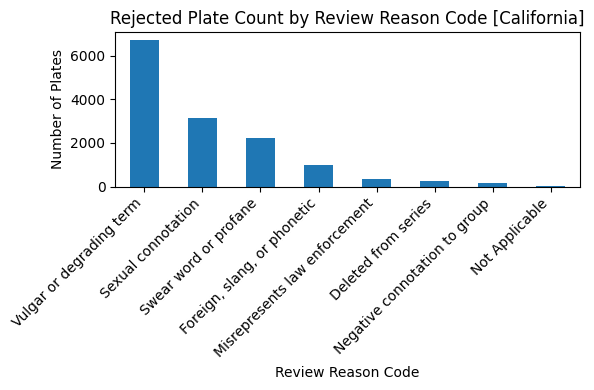

In [59]:
filtered_ca_plates = pd.DataFrame(combined_dataframe)

# Create a dictionary for shortened labels
review_reason_labels = {
    1: 'Sexual connotation',
    2: 'Vulgar or degrading term',
    3: 'Swear word or profane',
    4: 'Negative connotation to group',
    5: 'Misrepresents law enforcement',
    6: 'Deleted from series',
    7: 'Foreign, slang, or phonetic',
    8: 'Not Applicable'
}

# Convert 'review_reason_code' to numeric, handling errors by coercing non-numeric values to NaN
combined_dataframe['review_reason_code'] = pd.to_numeric(ca_plates['review_reason_code'], errors='coerce')

# Filter the dataset, but now with the numeric 'review_reason_code' column
filtered_data = combined_dataframe[(combined_dataframe['status'] == 'Rejected') & (combined_dataframe['review_reason_code'].between(1, 8))]

# Group by 'review_reason_code' and count the occurrences
review_counts = filtered_data['review_reason_code'].value_counts()

# Plot the data
plt.figure(figsize=(6, 4))
ax = review_counts.plot(kind='bar', color='#1f77b4')

# Relabel x-axis ticks with the corresponding shortened labels
ax.set_xticklabels([review_reason_labels.get(code, str(code)) for code in review_counts.index])

# Add titles and labels
plt.title('Rejected Plate Count by Review Reason Code [California]')
plt.xlabel('Review Reason Code')
plt.ylabel('Number of Plates')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Show the plot
plt.tight_layout()
plt.show()

In [60]:
# Export the DataFrame to a CSV file
#ny_combined.to_csv('ny_plates.csv', index=False)

In [61]:
ny_combined.head()

,date,plate,status,year
0,2010-10-01,ANDARE,Accepted,2010
1,2010-10-01,1TWIN,Accepted,2010
2,2010-10-01,11VROD,Accepted,2010
3,2010-10-01,4SKNMC,Accepted,2010
4,2010-10-01,7IRON6,Accepted,2010


In [62]:
ny_combined['category'] = ny_combined['status'].apply(lambda x: "Not Applicable" if x == "Accepted" else None)


In [63]:
ny_combined.head()

,date,plate,status,year,category
0,2010-10-01,ANDARE,Accepted,2010,Not Applicable
1,2010-10-01,1TWIN,Accepted,2010,Not Applicable
2,2010-10-01,11VROD,Accepted,2010,Not Applicable
3,2010-10-01,4SKNMC,Accepted,2010,Not Applicable
4,2010-10-01,7IRON6,Accepted,2010,Not Applicable


In [64]:
test_data = ny_combined.iloc[10000:]

In [65]:
accepted_data = test_data[test_data['status'] == 'Accepted']
rejected_data = test_data[test_data['status'] == 'Rejected']

In [66]:
random_accepted_plates = accepted_data.sample(n=500, random_state=42)
random_rejected_plates = rejected_data.sample(n=500, random_state=42)

In [67]:
test_plates = pd.concat([random_accepted_plates, random_rejected_plates])

In [68]:
test_plates.head()

,date,plate,status,year,category
19155,2011-04-01,USMCRD,Accepted,2011,Not Applicable
29181,2011-06-11,GTGOOO,Accepted,2011,Not Applicable
75098,2012-10-19,VMCLI,Accepted,2012,Not Applicable
30602,2011-06-24,BM3R,Accepted,2011,Not Applicable
26998,2011-05-24,JP66,Accepted,2011,Not Applicable


In [69]:
test_plates=test_plates[['year','plate','status','category']]

In [70]:
test_plates.to_csv('test_plates.csv', index=False)